___
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2F4.bp.blogspot.com%2F-OQZGt_5WqDo%2FWa_Dfa4U15I%2FAAAAAAAAAUI%2FveRmAmUUKFA19dVw6XCOV2YLO6n-y_omwCLcBGAs%2Fs1600%2Fout.jpg&f=1&nofb=1&ipt=1dd6a02de0e3c13ae4585e7abf56f5191364c82f5f94af05007bc3e46a5d8866" width="200px" height="180px" />


# <font color= #bbc28d> **Fashion MNIST** </font>
#### <font color= #2E9AFE> `Project 1 - Machine Learning`</font>
- <Strong> Sofía Maldonado, Diana Valdivia, Samantha Sánchez, Isabel Valladolid & Vivienne Toledo </Strong>
- <Strong> Fecha </Strong>: 21/09/2025.

___

<p style="text-align:right;"> Image retrieved from: https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2F4.bp.blogspot.com%2F-OQZGt_5WqDo%2FWa_Dfa4U15I%2FAAAAAAAAAUI%2FveRmAmUUKFA19dVw6XCOV2YLO6n-y_omwCLcBGAs%2Fs1600%2Fout.jpg&f=1&nofb=1&ipt=1dd6a02de0e3c13ae4585e7abf56f5191364c82f5f94af05007bc3e46a5d8866</p>

# <font color= #bbc28d> **Introduction** </font>
The goal of this project is to classify fashion items using the **Fashion-MNIST** image dataset, which contains **60,000 training** images and **10,000 test** images of 28×28 grayscale images representing 10 different categories (e.g., t-shirts, trousers, sneakers).

We will implement and evaluate various machine learning and deep learning algorithms to compare their performance in image classification:
- Logistic Regression 
- Support Vector Machine (SVM)
- Random Forest
- Neural Network (MLP) 
- Convolutional Neural Network (CNN) 

The project will involve loading and preprocessing the dataset, training each model, and evaluating their accuracy on the test set to understand how different algorithms perform on visual data classification tasks

# <font color= #bbc28d> **Data Preprocessing** </font>
Before modeling, we must preprocess the data to achieve better results and ensure it can be used by our models.

In [1]:
# Librerías Generales
import numpy as np
import time
from tensorflow.keras import datasets
from PIL import Image

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, callbacks, optimizers
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Modelos
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Pytorch CNN
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision import datasets as torchdata

### <font color= #bbc28d>• **Data Loading** </font>
We load the Fashion-MNIST dataset and then split the original training set into a **training and development (validation)** set using an 80-20 split. The split keeps the class distribution consistent.
So in total we have:
- Train data - 48_000 [For training our models]
- Dev data - 12_000 [Tunning the params]
- Test data - 10_000 [One blind real test]

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print(f"""Train Data: {X_train.shape} \n
Dev Data: {X_dev.shape} \n
Test Data: {X_test.shape}""")

Train Data: (48000, 28, 28) 

Dev Data: (12000, 28, 28) 

Test Data: (10000, 28, 28)


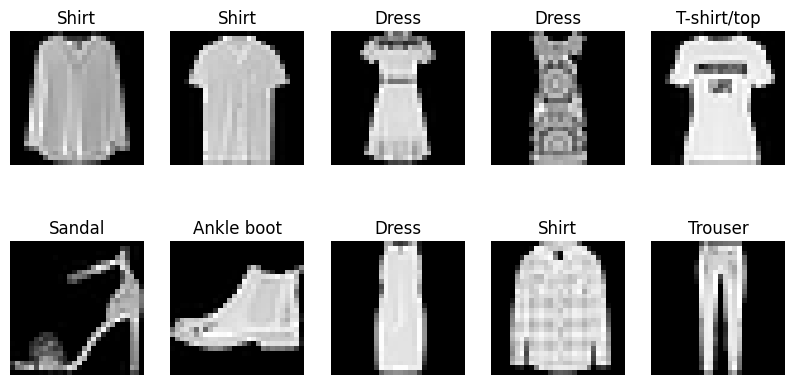

In [3]:
# Visualize the images
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show()

### <font color= #bbc28d>• **Image Normalization** </font>
Pixel values range from 0 to 255. Scaling them to [0,1] improves model performance.

In [4]:
# Normalize and expand dims [for keras imagedatagenerator]
X_train_norm = np.expand_dims(X_train, -1).astype(np.float32) / 255.0

# Simple normalize and flatten
X_dev_flat  = (X_dev.astype(np.float32) / 255.0).reshape(len(X_dev), -1)
X_test_flat = (X_test.astype(np.float32) / 255.0).reshape(len(X_test), -1)

### <font color= #bbc28d>• **Noise Insertion** </font>
To improve generalization, we will use `ImageDataGenerator` from Keras to synthetically augment the training images. This includes transformations such as random zooms, horizontal flips, and other small variations. These augmentations are **applied only to the training set**, while the development and test sets remain unchanged, allowing us to evaluate the models on the original data and ensure they generalize well.

In [5]:
# Data generator to add noise / transformations
datagen = ImageDataGenerator(  
    rotation_range=10,                  # Image Rotation
    width_shift_range=0.1,              # Width Shift
    height_shift_range=0.1,             # Height Shift
    shear_range=0.05,                   # Axis Bias
    zoom_range=0.1,                     # Zoom
    horizontal_flip=True,               # Horizontal Split
)

# Generate augmented images 
data_gen_train = datagen.flow(X_train_norm, y_train, batch_size=32, seed=42)

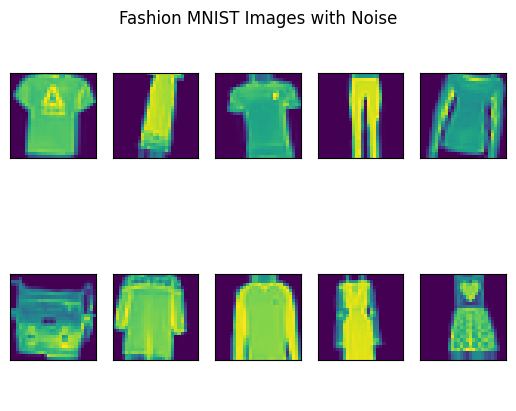

In [6]:
plt.title('Fashion MNIST Images with Noise')
plt.axis("off")
for imagen, etiqueta in data_gen_train:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

The variable _data-gen-train_ contains the images with noise added, in adequate dimensions for a Keras Convolutional Neural Network (CNN). 

### <font color= #bbc28d>• **Image Vectorization** </font>
Some of the models used in this notebook only accept vectorized input variables. Thus, we have to vectorize _data-gen-train_.

In [7]:
X_train_aug = []
y_train_aug = []

for i in range(len(data_gen_train)):
    X_batch, y_batch = data_gen_train[i]
    X_train_aug.append(X_batch)
    y_train_aug.append(y_batch)

X_train_aug = np.concatenate(X_train_aug)
y_train_aug = np.concatenate(y_train_aug)

# Flatten for Random Forest
X_train_flat = X_train_aug.reshape(len(X_train_aug), -1)

In the end, after all the data pre-processing we have the next datasets:
- **Train** - X_train_flat, y_train_aug
- **Dev** - X_dev_flat, y_dev
- **Test** - X_test_flat, y_test

All ready to be passed into sci-kit learn models.

# <font color= #bbc28d> **Logistic Regression** </font>

# <font color= #bbc28d> **Support Vector Classifier** </font>

In [8]:
def eval(y_true, y_pred):
    # Calcular métricas
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Mostrar resultados
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xticks(rotation = 75)
    plt.show()

In [14]:
svc = SVC(kernel='rbf', gamma='scale', C=5, random_state=69)

svc.fit(X_train_flat, y_train_aug)

SVC(C=5, random_state=69)

Accuracy: 0.8450
Precision: 0.8509
Recall: 0.8450
F1 Score: 0.8466


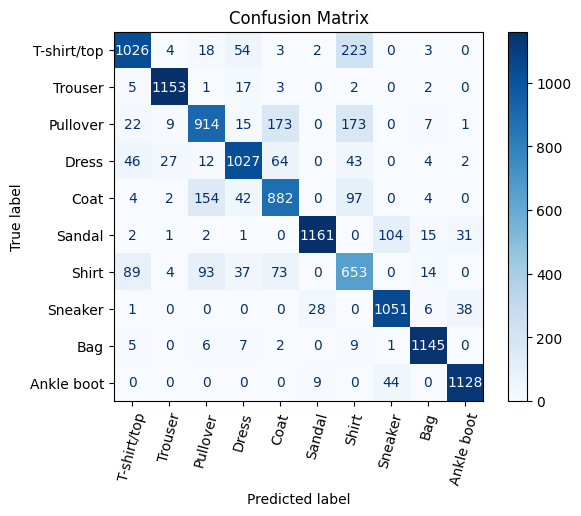

In [15]:
y_pred2 = svc.predict(X_dev_flat)

eval(y_pred2, y_dev)

Testing the SVC model with `kernel = rbf, gamma = scale, and C = 5` gives us a overall score of 0.845, which isn't bad but it can be improved. We tried playing with the hyperparameters of SVC, however, they did not prove to be very useful in improving the score. Thus, a further data preprocessing could be considered for SVC, such as PCA.

In [9]:
pca = PCA(n_components=100).fit(X_train_flat)

X_train_pca = pca.transform(X_train_flat)
X_dev_pca = pca.transform(X_dev_flat)

In [10]:
svc_pca = SVC(kernel='rbf', gamma='scale', C=20, random_state=69)

svc_pca.fit(X_train_pca, y_train_aug)

SVC(C=20, random_state=69)

Accuracy: 0.8577
Precision: 0.8577
Recall: 0.8577
F1 Score: 0.8573


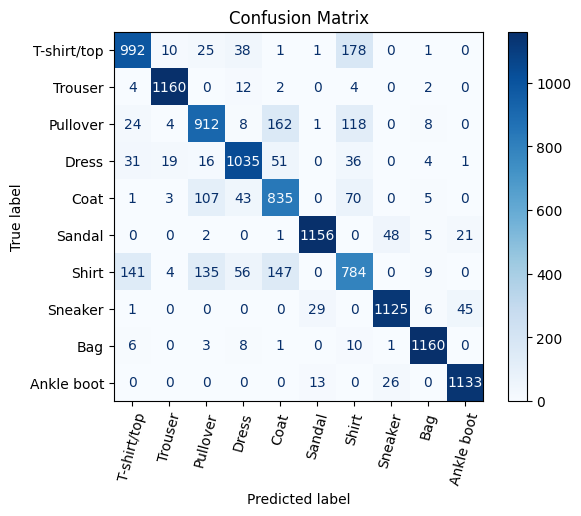

In [11]:
y_pred2 = svc_pca.predict(X_dev_pca)

eval(y_pred2, y_dev)

Using a PCA for dimensionality reduction improved the model for around 1 point. Even when playing with the components, and once again, the hyperparameters for SVC, results didn't seem to improve. Thus, the maximum score obtained for a SVC model was 0.857 overall. 

Accuracy: 0.8463
Precision: 0.8463
Recall: 0.8463
F1 Score: 0.8458


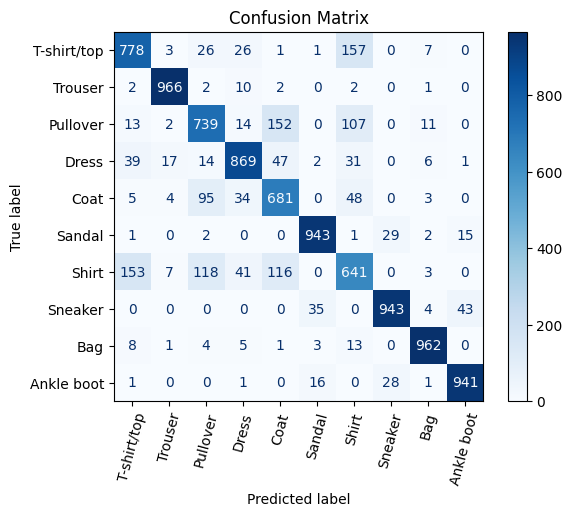

In [12]:
X_test_pca = pca.transform(X_test_flat)

y_pred2 = svc_pca.predict(X_test_pca)

eval(y_pred2, y_test)

Finally, testing the SVC with PCA preprocessing, we obtained a consistent score of 0.846 throughout all metrics. This suggests that our model is not overfitted. 

# <font color= #bbc28d> **Random Forest Classifier** </font>

To identify the best parameters while efficiently balancing performance and execution costs, we first visualized the behavior of a base model across different parameter values. After narrowing down the options, we finalized the following grid:

In [ ]:
# Using the graphs as inspo, make a grid that could give the best results without overfitting
param_grid = {        
    'max_depth': [10, 11, 12, 13],           # based on your earlier search
    'min_samples_leaf': [2, 3, 5, 6],           # regularization for leaves
    'min_samples_split': [6, 8, 10, 12],      # regularization for splits
    'ccp_alpha' : [0.001, 0.0001, 0.00001]      # regularization param
}

# Make the object base model
rf = RandomForestClassifier(
    n_estimators = 100,
    bootstrap=False,
    n_jobs=-1,
    random_state=2
)

# Use grid_search to find the best params
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_macro',  
    cv=3,
    verbose=2,
    n_jobs=-1
)

# To make the process faster, we will use a small portion
slice_size = 10000  
X_train_slice = X_train_flat[:slice_size]
y_train_slice = y_train_aug[:slice_size]

# Fit the grid
grid_search.fit(X_train_slice, y_train_slice)

# Print the results to use in the train data
print("Best params from train set:", grid_search.best_params_)
print("Best CV f1_score on train:", grid_search.best_score_)

Now, we will use those parameters to create our final model:

In [37]:
# Use the params obtained in CV
clf =  RandomForestClassifier(
    n_estimators=100,
    max_depth=13,
    min_samples_leaf=2,
    min_samples_split=12,
    bootstrap=False,
    n_jobs=-1,
    ccp_alpha = 0.00001,
    random_state=2
)

# Train the model
clf.fit(X_train_flat, y_train_aug)

# Metrics on the dev/train
dev_acc = clf.score(X_dev_flat, y_dev)
train_acc = clf.score(X_train_flat, y_train_aug)
print(f"Train Accuracy: {train_acc:.3f}")
print(f"Dev Accuracy: {dev_acc:.3f}")

Train Accuracy: 0.868
Dev Accuracy: 0.787


Finally, after re-adjusting and tunning the hyper-parameters of the model, let's make predictions and take out the perfomance metrics:

Accuracy: 0.776
Precision: 0.771
Recall: 0.776
F1 Score: 0.768


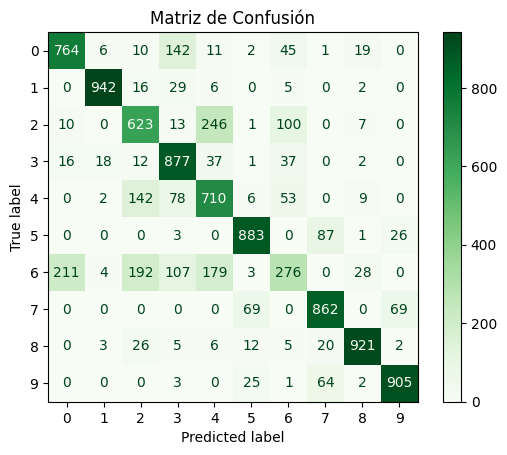

In [9]:
# Make predictions on test
y_pred = clf.predict(X_test_flat)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Show metrics performance
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

# CM
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Greens')
plt.title('Matriz de Confusión')
plt.show()

As we can see, the model’s performance isn’t necessarily bad, but it could be much better, especially for **Random Forests**. Random Forests **perform worse with augmented images** because they treat **each pixel independently**, so small rotations, shifts, or flips create “noisy” patterns that confuse the model, while plain flattened images keep patterns consistent and easier to learn. 

Let´s try a similar model, but with different data processing:

In [12]:
# Just normalize and flatten the data
X_train_flat_rf = X_train.astype(np.float32).reshape(len(X_train), -1) / 255.0
X_dev_flat_rf   = X_dev.astype(np.float32).reshape(len(X_dev), -1) / 255.0
X_test_flat_rf  = X_test.astype(np.float32).reshape(len(X_test), -1) / 255.0

We created our new model based on the insights from the graphs used for the first one and also manually fine-tuned the parameters:

In [13]:
# Object of the rf Model
# Smaller number of trees but similar values on the params

rf_clf = RandomForestClassifier(n_estimators=80, max_depth=13, min_samples_split=6, min_samples_leaf=7, random_state=42, n_jobs=-1)

# Train the model
rf_clf.fit(X_train_flat_rf, y_train)

# Metrics on the dev/train
dev_acc = rf_clf.score(X_dev_flat_rf, y_dev)
train_acc = rf_clf.score(X_train_flat_rf, y_train)
print(f"Train Accuracy: {train_acc:.3f}")
print(f"Dev Accuracy: {dev_acc:.3f}")

Train Accuracy: 0.916
Dev Accuracy: 0.871


As we can see, how we process the data has a huge impact on the model’s performance. Now let’s evaluate it on the test set, since we are happy with it:

Accuracy: 0.860
Precision: 0.860
Recall: 0.860
F1 Score: 0.858


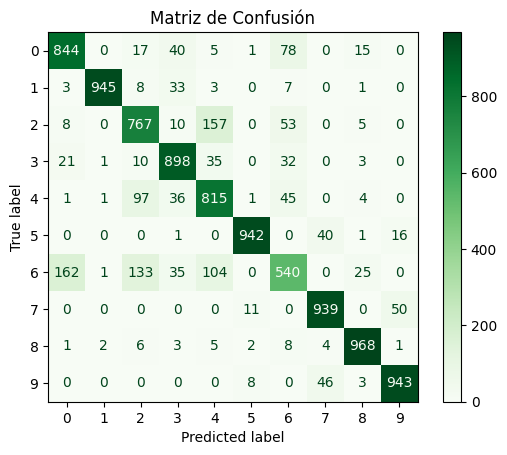

In [10]:
# Make predictions on test
y_pred = rf_clf.predict(X_test_flat_rf)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Show metrics performance
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

# CM
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot(cmap='Greens')
plt.title('Matriz de Confusión')
plt.show()

# <font color= #bbc28d> **Multilayered Perceptron** </font>

In [ ]:
# Define model
def build_mlp(input_dim=784, n_classes=10):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(n_classes, activation="softmax")
    ])
    return model

mlp = build_mlp()
mlp.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile
mlp.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [76]:
# Training
es = callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = mlp.fit(
    X_train_flat, y_train_aug,
    validation_data=(X_dev_flat, y_dev),
    batch_size=128,
    epochs=50,
    callbacks=[es],
    verbose=1
)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.6136 - loss: 1.0078 - val_accuracy: 0.7558 - val_loss: 0.6271
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7089 - loss: 0.7588 - val_accuracy: 0.7985 - val_loss: 0.5630
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7344 - loss: 0.6957 - val_accuracy: 0.7977 - val_loss: 0.5430
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7471 - loss: 0.6586 - val_accuracy: 0.8125 - val_loss: 0.5001
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7572 - loss: 0.6309 - val_accuracy: 0.8179 - val_loss: 0.5108
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7634 - loss: 0.6138 - val_accuracy: 0.8012 - val_loss: 0.5116
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7713 - loss: 0.5946 - val_accuracy: 0.8183 - val_loss: 0.4770
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7755 - loss: 0.5792 - val_accu

In [77]:
# Evaluate on test
test_loss, test_acc = mlp.evaluate(X_test_flat, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")


Test loss: 0.4424 | Test accuracy: 0.8380


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0     0.7692    0.8230    0.7952      1000
           1     0.9846    0.9610    0.9727      1000
           2     0.7095    0.7230    0.7162      1000
           3     0.8311    0.8710    0.8506      1000
           4     0.7269    0.7320    0.7294      1000
           5     0.9378    0.9340    0.9359      1000
           6     0.6131    0.5260    0.5662      1000
           7     0.9307    0.8860    0.9078      1000
           8     0.9495    0.9590    0.9542      1000
           9     0.9070    0.9650    0.9351      1000

    accuracy                         0.8380     10000
   macro avg     0.8359    0.8380    0.8363     10000
weighted avg     0.8359    0.8380    0.8363     10000



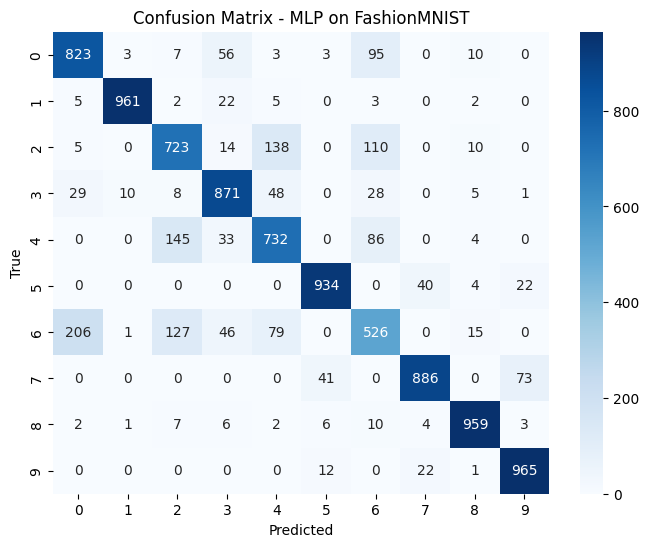

In [78]:
# Report and confusion matrix
y_pred_probs = mlp.predict(X_test_flat)
y_pred = y_pred_probs.argmax(axis=1)

print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MLP on FashionMNIST")
plt.show()

# <font color= #bbc28d> **Convolutional Neural Network** </font>

In [3]:
# Checking GPU access
print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "dont")
print(device)

True
cuda


In [4]:
torch.cuda.manual_seed(42)
torch.cuda.manual_seed_all(42)

In [5]:
# Transformation pipeline to turn images into tensors, and normalizing said images ()
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28,28)),
    transforms.RandomAffine(degrees=10, # Image Rotation
                            translate=(0.1, 0.1), # Width and height shift
                            shear=5, # Axis Bias
                            scale=(0.9, 1.1)), #zoom Range
    transforms.RandomHorizontalFlip(), # Horizontal flip
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5)
    
])

In [6]:
# Loading the data

train_data = torchdata.FashionMNIST(root='./Data', train=True, download=True, transform=transform)
test_data = torchdata.FashionMNIST(root='./Data', train=False, download=True, transform=transform)

BATCH_SIZE = 64

trainloader = DataLoader(train_data, batch_size= BATCH_SIZE, shuffle=True)
testloader = DataLoader(test_data, batch_size= BATCH_SIZE, shuffle=True)

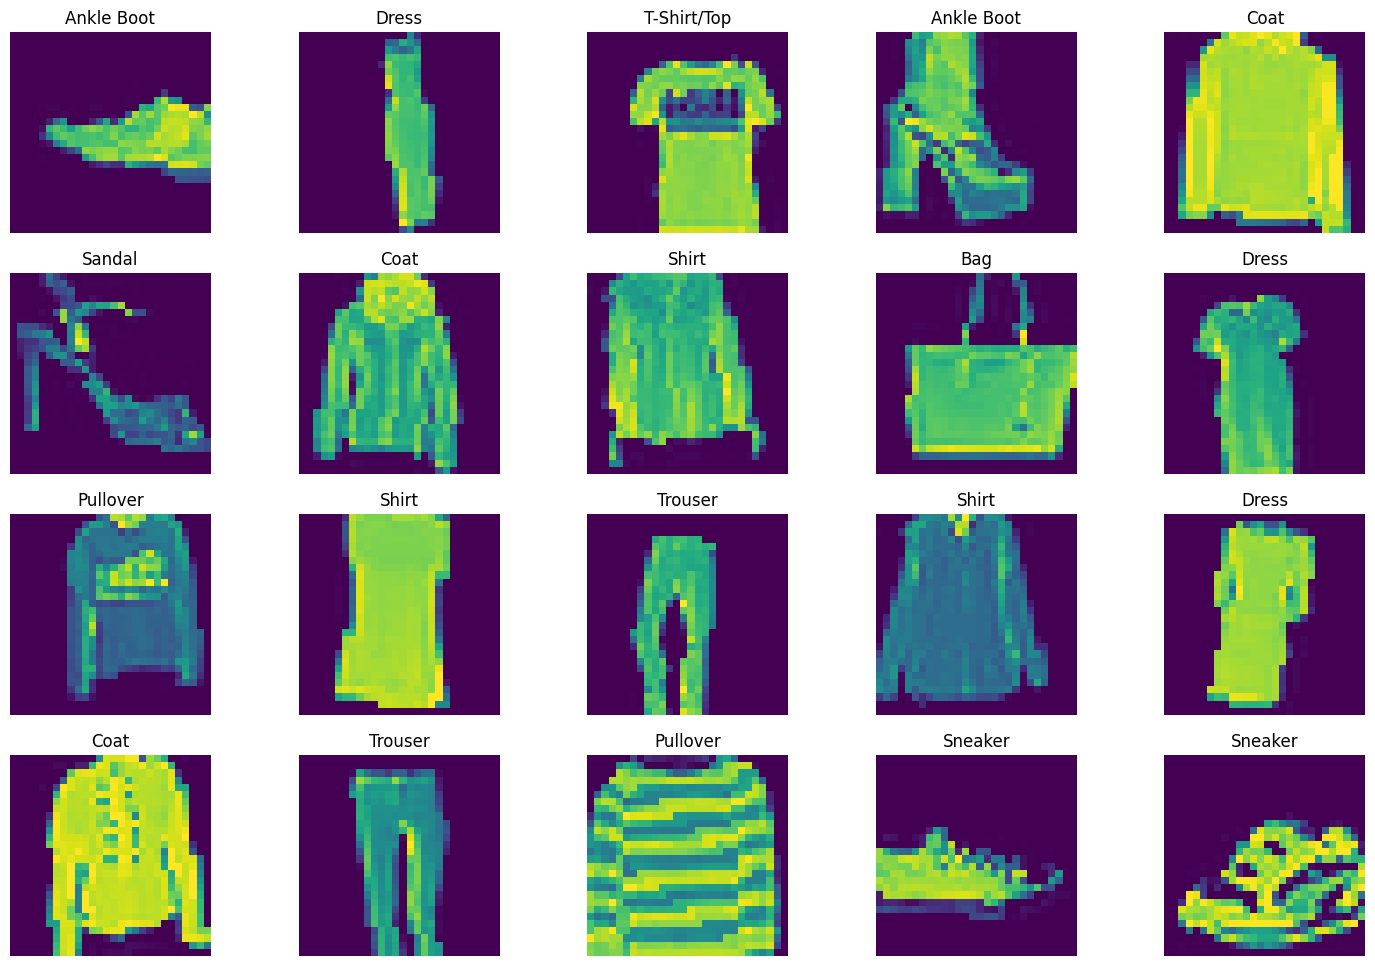

In [7]:
# Pre-Viz of the images
class_names = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

images, labels = next(iter(trainloader))

preview = plt.figure(figsize=(18,12))
for i in range(20):
    ax = preview.add_subplot(4, 5, i+1)
    img = images[i].permute(1,2,0).numpy()
    ax.imshow(np.squeeze(img))
    ax.set_title(class_names[labels[i].item()])
    ax.axis('off')
plt.show()

In [8]:
# Defining the model architecture

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size= 3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.dropout = nn.Dropout(0.25)
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        x = x.view(x.size(0), -1)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = CNN().to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [9]:
# Training model

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Lists for visualization later
train_loss = []

# Training loop

EPOCHS = 7 # Doing trial and error testing, 7 appears to be the sweet spot in the number of epochs to avoid overfitting the model
for epoch in range(EPOCHS):
    start_time = time.time()
    model.train()
    running_loss = 0
    for i, (images, labels) in enumerate(trainloader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    training_loss = running_loss/len(trainloader)
    train_loss.append(training_loss)
    
    print(f'Epoch: {epoch + 1}. Loss {training_loss:.2f}. Time Taken: {(time.time() - start_time):.2f}')

Epoch: 1. Loss 0.76. Time Taken: 21.44
Epoch: 2. Loss 0.56. Time Taken: 20.63
Epoch: 3. Loss 0.50. Time Taken: 20.67
Epoch: 4. Loss 0.45. Time Taken: 20.91
Epoch: 5. Loss 0.43. Time Taken: 20.76
Epoch: 6. Loss 0.41. Time Taken: 21.38
Epoch: 7. Loss 0.40. Time Taken: 20.44


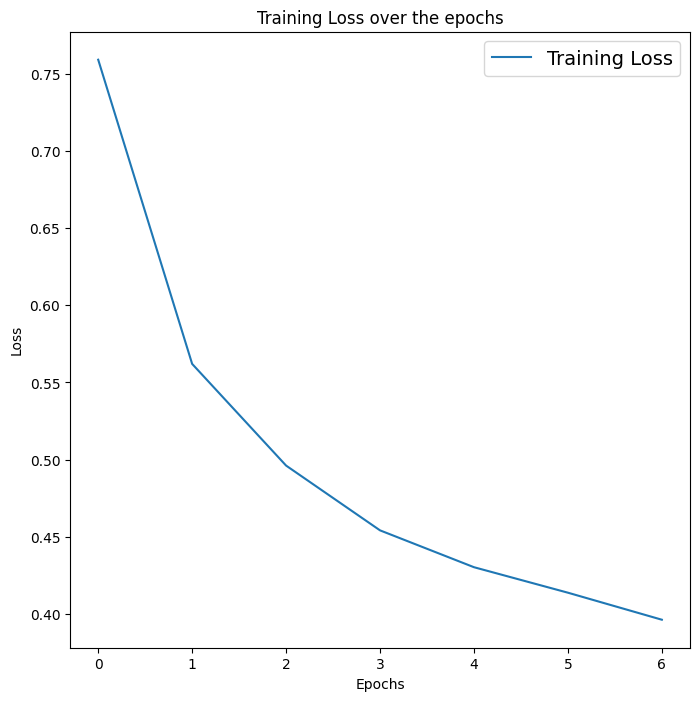

In [10]:
# Training loss over time

plt.figure(figsize=(8,8))
plt.title("Training Loss over the epochs")
plt.plot(train_loss, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(fontsize=14)

Accuracy: 86.2100
              precision    recall  f1-score   support

 T-Shirt/Top       0.79      0.83      0.81      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.77      0.82      0.80      1000
       Dress       0.87      0.88      0.87      1000
        Coat       0.76      0.81      0.78      1000
      Sandal       0.96      0.94      0.95      1000
       Shirt       0.65      0.53      0.58      1000
     Sneaker       0.92      0.93      0.92      1000
         Bag       0.95      0.98      0.96      1000
  Ankle Boot       0.94      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



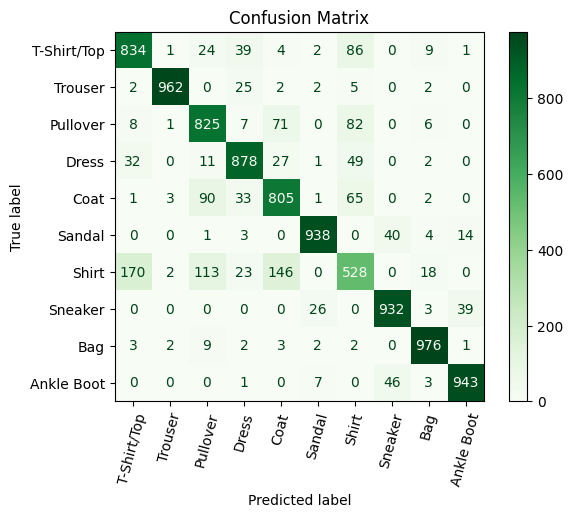

In [17]:
# Model evaluation
model.eval()
correct = 0
total = 0

all_predictions = []
all_labels = []

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * (correct / total)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(all_labels, all_predictions)
cm_display = ConfusionMatrixDisplay(cm, display_labels=class_names)
cm_display.plot(cmap="Greens")
plt.title("Confusion Matrix")
plt.xticks(rotation = 75)
plt.plot()

print(classification_report(all_labels, all_predictions, target_names=class_names))

In [12]:
# Testing with own images

image = Image.open("FotosPrueba/pullover3.jpg")

image_tensor = transform(image).unsqueeze(0).to(device)

# Test
model.eval()
with torch.no_grad():
    output = model(image_tensor)
    probs = torch.softmax(output, dim=1)
    pred = torch.argmax(probs, dim=1).item()

print(f"Predicted Class: {class_names[pred]}")
print(f"Probabilities: {probs.cpu().numpy()}")

Predicted Class: Pullover
Probabilities: [[1.4516366e-01 3.2651052e-11 8.2860190e-01 7.7033198e-09 3.7093795e-08
  1.2707026e-08 1.1847545e-03 7.3874815e-13 2.5049664e-02 2.3313835e-11]]


# <font color= #bbc28d> **Caso de Prueba- Vida Real** </font>

### <font color= #bbc28d>• **Image pre-processing** </font>
Before we try our new images into the models, we have to pre-process them so that they will be treated the same way our models were trained:

In [30]:
import os, re
import numpy as np
from tensorflow.keras.preprocessing import image

ruta_imagenes = "FotosPrueba"

class_map = {
    'tshirt': 0, 'trouser': 1, 'pullover': 2, 'dress': 3,
    'coat': 4, 'sandal': 5, 'shirt': 6, 'sneaker': 7,
    'bag': 8, 'ankleboot': 9
}

imagenes_paths, labels = [], []
for archivo in os.listdir(ruta_imagenes):
    if archivo.lower().endswith(('.jpg', '.png', '.jpeg')):
        imagenes_paths.append(os.path.join(ruta_imagenes, archivo))
        nombre_clase = re.match(r"[A-Za-z_]+", archivo).group().lower()
        labels.append(class_map[nombre_clase])

# cargar, normalizar y aplanar en una sola pasada
x_prueba = np.array([
    image.img_to_array(
        image.load_img(ruta, color_mode="grayscale", target_size=(28, 28))
    ).squeeze() for ruta in imagenes_paths
], dtype="float32") / 255.0

x_prueba = x_prueba.reshape(len(x_prueba), -1)  # (n_imagenes, 784)
y = np.array(labels, dtype="int")

print(x_prueba.shape, y.shape)
print("Primeras etiquetas:", y[:])

(12, 784) (12,)
Primeras etiquetas: [8 8 8 2 2 2 5 5 5 7 7 7]


### <font color= #bbc28d>• **Random Forest** </font>

Accuracy: 0.250
Precision: 0.068
Recall: 0.250
F1 Score: 0.107


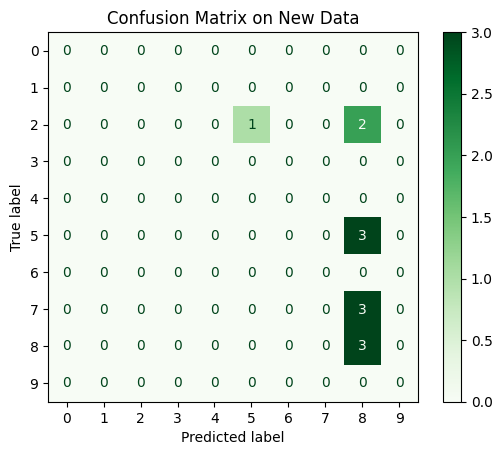

In [31]:
# Make predictions
y_pred = rf_clf.predict(x_prueba)

# Metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted', zero_division=0)
recall = recall_score(y, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y, y_pred, average='weighted', zero_division=0)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

# CM
all_labels = np.arange(10)  # all Fashion-MNIST classes
cm = confusion_matrix(y, y_pred, labels=all_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
disp.plot(cmap='Greens')
plt.title('Confusion Matrix on New Data')
plt.show()

### <font color= #bbc28d>• **Random Forest [Noise]** </font>

Accuracy: 0.083
Precision: 0.062
Recall: 0.083
F1 Score: 0.071


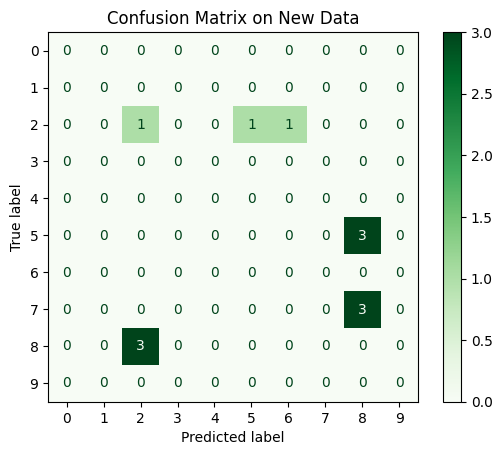

In [38]:
# Make predictions
y_pred = clf.predict(x_prueba)

# Metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted', zero_division=0)
recall = recall_score(y, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y, y_pred, average='weighted', zero_division=0)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

# CM
all_labels = np.arange(10)  # all Fashion-MNIST classes
cm = confusion_matrix(y, y_pred, labels=all_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
disp.plot(cmap='Greens')
plt.title('Confusion Matrix on New Data')
plt.show()

To see why it went so wrong let's see the images we are working with:

Number of misclassified images: 11


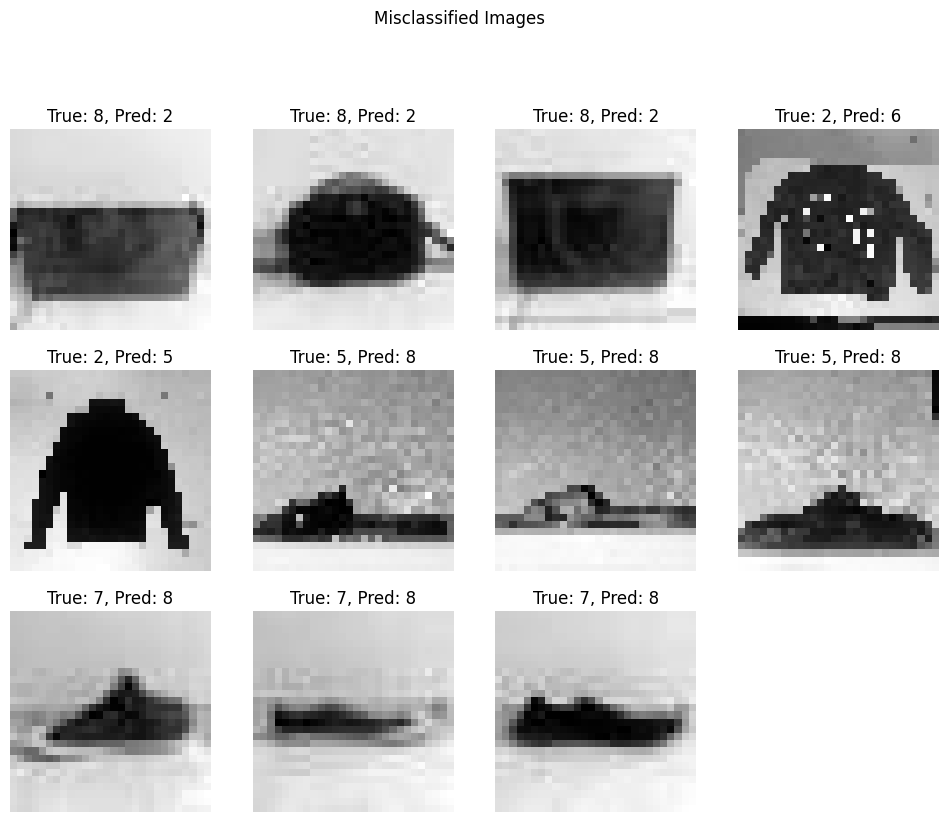

In [ ]:
# Get misclassified indices
mis_idx = np.where(y != y_pred)[0]

print(f"Number of misclassified images: {len(mis_idx)}")

# Show up to 16 misclassified images
num_to_show = min(16, len(mis_idx))
plt.figure(figsize=(12, 12))

for i, idx in enumerate(mis_idx[:num_to_show]):
    plt.subplot(4, 4, i+1)
    # Reshape back to 28x28
    img = x_prueba[idx].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {y[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')

plt.suptitle("Misclassified Images")
plt.show()

As we can see, due to the pixelated they are and how they are not as clean as the images from F-MNIST, Rnadom Forest get confused due to all the pixels, that's mainly one of the reasons CNN's are preferred over them :(